# Gradient descent

Let us consider the **House Pricing** dataset, where you have a lot of information about the houses being sold and you aim to produce the price of the house. 


Firstly, let us import basic libraries:

In [1]:
import numpy as np
import pandas as pd

### 1. Reading 

In [2]:
datX = np.load('x_train.npy')
datY = np.log(np.load('y_train.npy'))
datX = pd.DataFrame(datX, columns = datX.dtype.names)
datX.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2014-09-16,5.0,3.25,3710,34200,2.0,False,3,8,2510,1200,1986,0,98074,47.610100,-122.046997
1,2014-11-18,3.0,1.75,2820,8879,1.0,False,5,7,1540,1280,1920,1957,98146,47.509399,-122.375999
2,2014-11-10,3.0,1.00,1240,239144,1.0,False,3,6,1240,0,1921,1992,98038,47.430302,-122.045998
3,2015-04-16,4.0,2.50,2670,8279,2.0,False,3,7,2670,0,1999,0,98148,47.429199,-122.328003
4,2014-07-23,3.0,2.25,2700,4025,2.0,False,4,8,1760,940,1907,0,98122,47.607399,-122.293999


Okay, we manage to load the data. But it is not a necessity). We are going to use linear models to work with it, but firstly we need to come up with idea what features should we include in the model at all (which feature the price is lineary dependent on):

In order to do it let us plot every feature vs the price.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

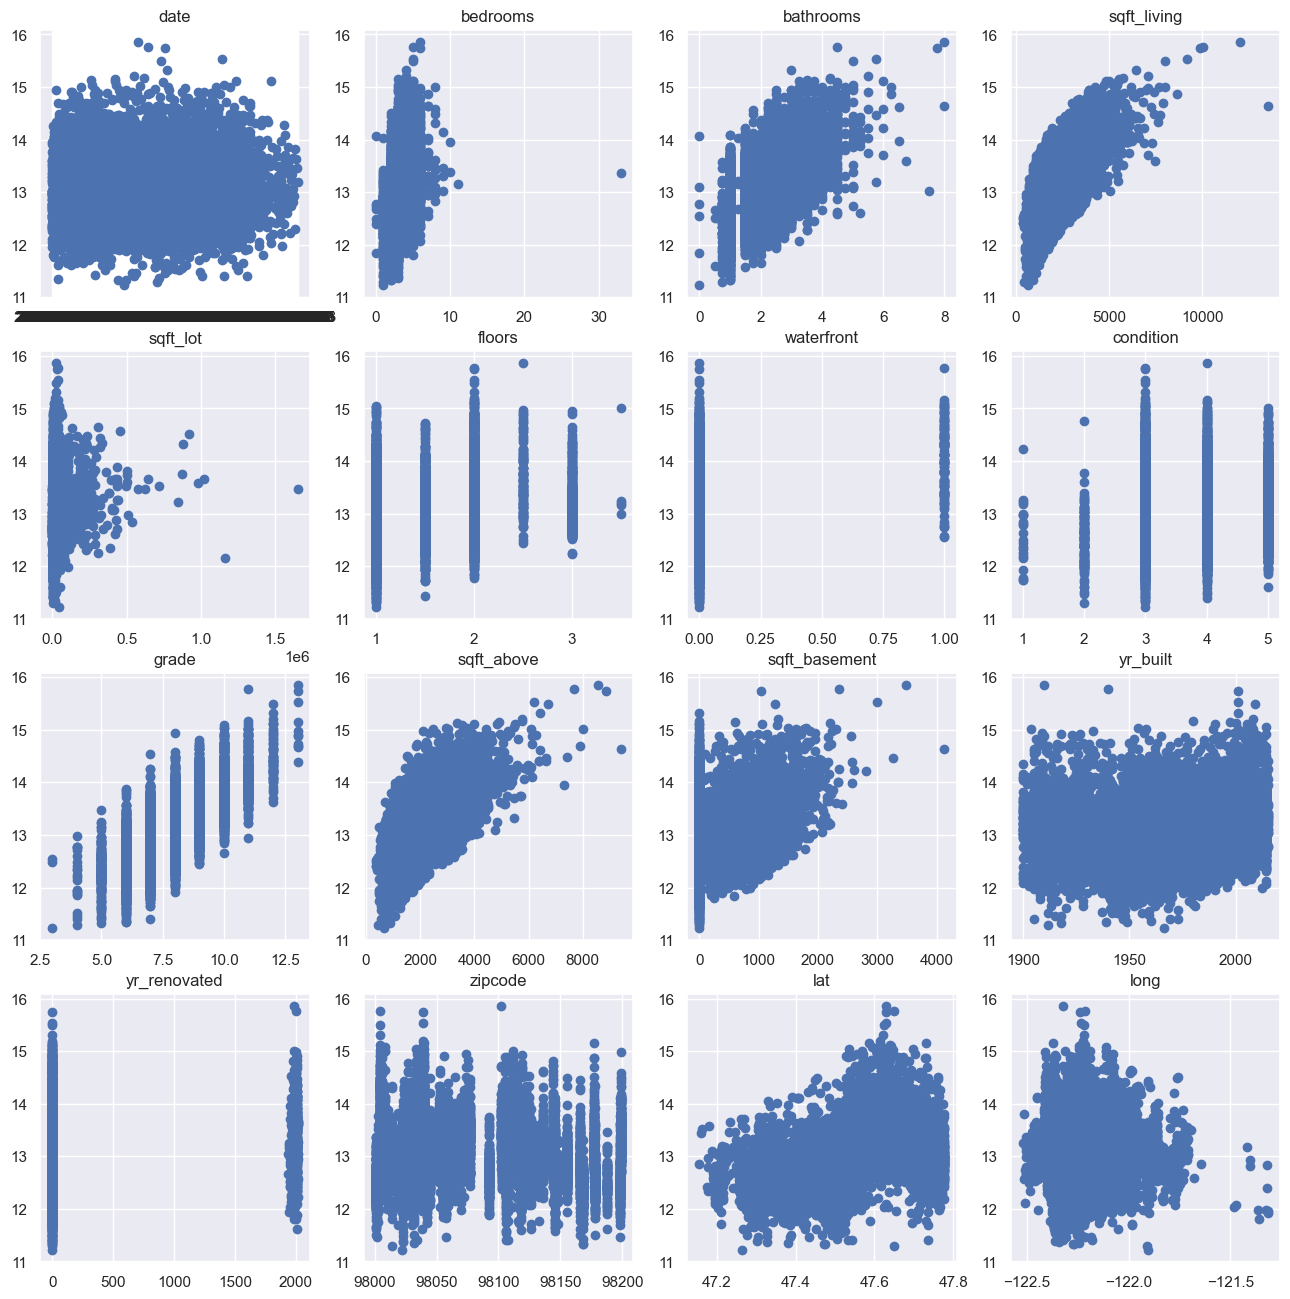

In [5]:
f, ax = plt.subplots(4, 4, figsize = (16,16))

for i, name in enumerate(datX.columns):
    ax[i // 4][i % 4].scatter(datX[name], datY)
    ax[i // 4][i % 4].set_title(name)

Let us say, that we choose to work the following set of features:
+ `bedrooms`
+ `bathrooms`
+ `sqft_living`
+ `floors`
+ `condition`
+ `grade`
+ `sqft_above`
+ `sqft_basement`
+ `long`
+ `lat`

Clear the dataset from all the other features and create:
1. matrix $X$, all elements should be real numbers
2. number $N$ -- number of considered houses
3. number $m$ -- number of new features

In [6]:
X = datX[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition',
         'grade', 'sqft_above', 'sqft_basement', 'long', 'lat']].copy()
N = len(X.axes[0])
m = len(X.axes[1])

Consider that we are interested in the loss of the model:

+ Assume we have input data that is denoted as $\vec{x}_1, \vec{x}_2, \ldots, \vec{x}_N$
+ House prices for this input data are known $y_1, y_2, \ldots, y_N$

We propose a **simple linear model** for this task:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

As a loss function we will use the mean squared error (**MSE**):

$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N (y_i-\hat{y}_i)^2
$$

### 2. Compute analytically the $Loss(\vec{w})$  function

In [7]:
def loss(w, X, y):
    first_column = np.array([np.full(shape=N, fill_value=1)]) # (1, 1, ..., 1)
    X = np.concatenate((first_column.T, np.array(X)), axis=1) # add first column (1, 1, ..., 1)
    yi = np.dot(X, w)
    return np.square(yi - y).mean() # lossValue

### 3. Compute analyticaly the gradient of the $Loss(\vec{w})$

$$ Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N (y_i-\hat{y}_i)^2 $$

$$\begin{equation}
X = \begin{bmatrix}
1 & x_{11} & ... & x_{1m} \\
\vdots & \vdots & ... & \vdots \\
1 & x_{N1} & ... & x_{Nm}
\end{bmatrix}
\end{equation}
$$

$$w = \begin{bmatrix} w_{0}, w_{1}, \dots, w_{m} \end{bmatrix}$$

$$y = \begin{bmatrix} 
y_{1}\\
\vdots\\
y_{N} 
\end{bmatrix}$$

$$ \hat{y}_i=w_01+w_1x_{i1}+w_2x_{i2}+\ldots+w_mx_{im} $$

$$\nabla Loss = \begin{bmatrix} 
\frac{\partial Loss}{\partial w_0} \\
\vdots \\
\frac{\partial Loss}{\partial w_m} \\
\end{bmatrix}$$

$$\frac{\partial Loss}{\partial w_0} = \frac{2}{N} \begin{bmatrix} 1, \dots, 1 \end{bmatrix} \begin{bmatrix} 
\hat{y}_1 - y_1\\
\vdots \\
\hat{y}_N - y_N \\
\end{bmatrix}$$

$$\frac{\partial Loss}{\partial w_1} = \frac{2}{N} \begin{bmatrix} x_{11}, \dots, x_{N1} \end{bmatrix} \begin{bmatrix} 
\hat{y}_1 - y_1\\
\vdots \\
\hat{y}_N - y_N \\
\end{bmatrix}$$

$$\frac{\partial Loss}{\partial w_i} = \frac{2}{N} \begin{bmatrix} x_{1i}, \dots, x_{Ni} \end{bmatrix} \begin{bmatrix} 
\hat{y}_1 - y_1\\
\vdots \\
\hat{y}_N - y_N \\
\end{bmatrix}$$

$$\nabla Loss = \frac{2}{N} \begin{bmatrix} 
\begin{bmatrix} 1, \dots, 1 \end{bmatrix} \begin{bmatrix} 
\hat{y}_1 - y_1\\
\vdots \\
\hat{y}_N - y_N \\
\end{bmatrix} \\
\vdots \\ \begin{bmatrix} x_{1i}, \dots, x_{Ni} \end{bmatrix} \begin{bmatrix} 
\hat{y}_1 - y_1\\
\vdots \\
\hat{y}_N - y_N \\
\end{bmatrix} \\
\end{bmatrix} = 
\frac{2}{N} \begin{bmatrix} 
\begin{bmatrix} 1, \dots, 1 \end{bmatrix} (Xw - y) \\
X_1^T (Xw - y)\\
\vdots \\ 
X_N^T (Xw - y)\\
\end{bmatrix} = \frac{2}{N} \begin{bmatrix} 
\begin{bmatrix} 1, \dots, 1 \end{bmatrix} \\
X_1^T\\
\vdots \\ 
X_N^T\\
\end{bmatrix} (Xw - y) = \frac{2}{N} X^T(Xw - y) = \frac{2}{N} X^T(\hat{y}_i - y)$$

### 4. Write a function to compute the gradient of the Loss function in the given point


In [8]:
def grad(w_k, X, y):
    first_column = np.array([np.full(shape=N, fill_value=1)]) # (1, 1, ..., 1)
    X = np.concatenate((first_column.T, np.array(X)), axis=1) # add first column (1, 1, ..., 1)
    lossGradient = (2 / N) * np.matmul(np.transpose(X), (np.matmul(X, w_k) - y))
    return lossGradient

### 5. Write gradient descent
How it is time to formulate the gradient descent!
$$
\vec{w}^{k+1}=\vec{w}^{k}-\alpha_k\cdot \nabla Loss(\vec{w}^{k})
$$
We propose that we use constant $\alpha_k=\alpha$. Assume that the method should stop in two cases:
+ if the number of iterations is to high (`maxiter`)
+ if the length of the gradient is low enough (<`eps`) to call an extremum

In [9]:
def gradDescent(w_init, alpha, X, y, maxiter=500, eps=1e-2):
    losses=[]
    weights=[w_init]

    curiter=0
    w_k=weights[-1]

    while curiter < maxiter:
        w_k = w_k - alpha * grad(w_k, X, y)
        lossValue_k = loss(w_k, X, y)

        weights.append(w_k)
        losses.append(lossValue_k)
        curiter += 1
        if np.linalg.norm(grad(w_k, X, y)) < eps:
            return weights, losses
    return weights, losses

Let's experiment with several alphas and several intial values of weights.

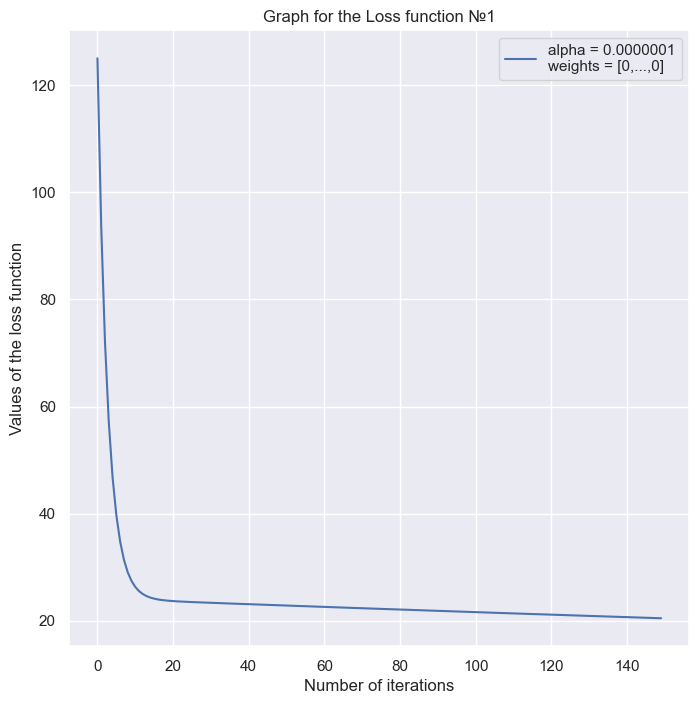

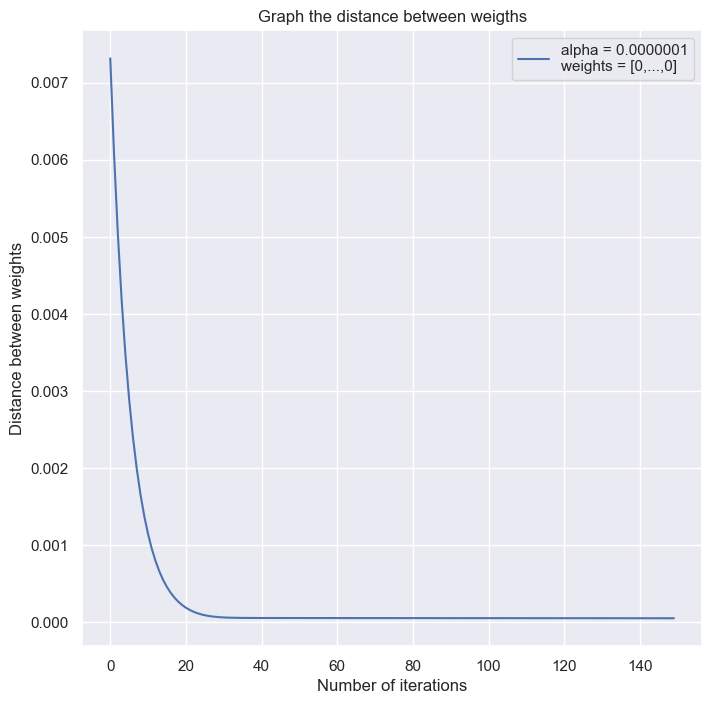

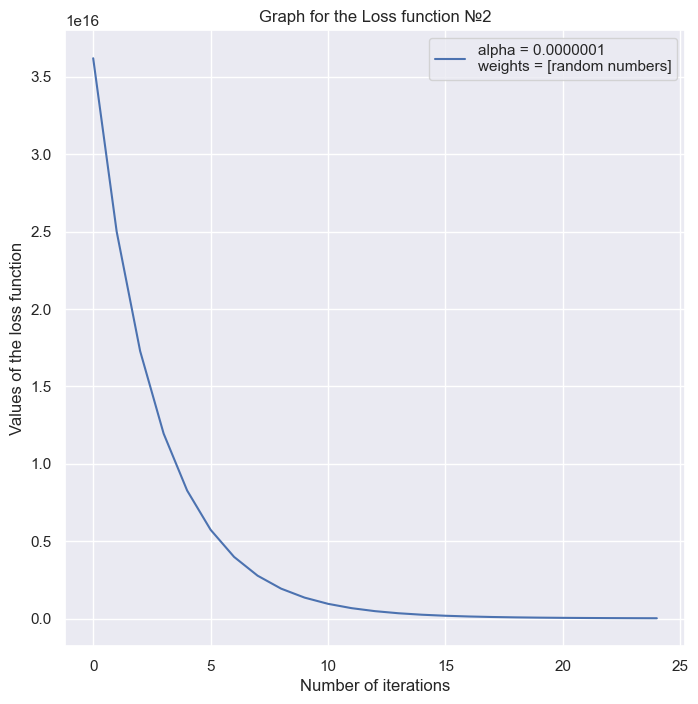

In [10]:
plt.figure(figsize=(8,8))

data1 = gradDescent([0 for _ in range(11)], 0.0000001, X, datY, maxiter=150)
x1 = len(data1[1])
y1 = data1[1]

plt.plot(range(x1), y1, label='alpha = 0.0000001\nweights = [0,...,0]')
plt.xlabel('Number of iterations')
plt.ylabel('Values of the loss function')
plt.title('Graph for the Loss function №1')
plt.legend()

distance = []
prev_vector = data1[0][0]
for vector in data1[0][1:]:
    distance.append(round(np.linalg.norm(prev_vector - vector), 10))
    prev_vector = vector

plt.figure(figsize=(8,8))

plt.plot(range(x1), distance, label='alpha = 0.0000001\nweights = [0,...,0]')
plt.xlabel('Number of iterations')
plt.ylabel('Distance between weights')
plt.title('Graph the distance between weigths')
plt.legend()

plt.figure(figsize=(8,8))

data2 = gradDescent([5000, 123, 478, 100500, 321, 0, 178, 32, 1514, 9871, 2], 0.0000001,
                   X, datY, maxiter=25)
x2 = len(data2[1])
y2 = data2[1]

plt.plot(range(x2), y2, label='alpha = 0.0000001\nweights = [random numbers]')
plt.xlabel('Number of iterations')
plt.ylabel('Values of the loss function')
plt.title('Graph for the Loss function №2')
plt.legend()

Let us check the adequacy of the model we created.

Let's choose several houses and calculte predicted prices by:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

In [11]:
def price_comparison(w, X, y):
    first_column = np.array([np.full(shape=len(y), fill_value=1)]) # (1, 1, ..., 1)
    X = np.concatenate((first_column.T, np.array(X)), axis=1) # add first column (1, 1, ..., 1)
    yi = np.dot(X, w)
    for value in enumerate(zip(yi, y), start=1):
        print(f'{value[0]}. The real price = {round(value[1][1], 2)}.\n'
              f'   Our prediction = {round(value[1][0], 2)}\n')
    return None

test_w = gradDescent([0 for _ in range(11)], 0.0000001, X, datY)[0][-1]
test_X = X.iloc[:10]
test_Y = datY[:10]
price_comparison(test_w, test_X, test_Y)
print('In some cases, our prediction differs significantly from the actual cost. '
      'This is unsatisfactory.')

1. The real price = 13.36.
   Our prediction = 17.35

2. The real price = 13.03.
   Our prediction = 13.43

3. The real price = 12.36.
   Our prediction = 8.3

4. The real price = 12.94.
   Our prediction = 14.44

5. The real price = 13.22.
   Our prediction = 13.35

6. The real price = 13.77.
   Our prediction = 13.4

7. The real price = 12.73.
   Our prediction = 11.02

8. The real price = 13.81.
   Our prediction = 16.65

9. The real price = 13.86.
   Our prediction = 17.55

10. The real price = 13.42.
   Our prediction = 8.02

In some cases, our prediction differs significantly from the actual cost. This is unsatisfactory.


### 6. Data transformation

As you have probably already seen above, the convergence of the gradient descent is not ideal for our data. One way to overcome this is to transform the input data so that:
+ the **average** of each feature should be $0$
+ the **standard deviation** of each feature should be $1$

In such a way levels of the loss function would be close to circles; thus one should hope to faster convergence.

Implement such normalisation:

In [12]:
def norm(X):
    # your code goes here
    X_norm = X.copy()
    mean = np.mean(X_norm, axis=0)
    std = np.std(X_norm, axis=0)
    return (X - mean) / std

### 7. And again

Let's repeat gradient descent experiments for different $\alpha$, now with transformed data.

The values of the weights before normalization and after 
(alpha = 0.0000001 number of iterations = 150)
       old_w     new_w
0   0.000058  0.000391
1   0.000127  0.000005
2   0.000048  0.000009
3   0.002893  0.000011
4   0.000058  0.000005
5   0.000206  0.000001
6   0.000328  0.000011
7   0.002235  0.000009
8   0.000658  0.000005
9  -0.007071  0.000001
10  0.002750  0.000007

Predicted prices after normalization:
1. The real price = 13.36.
   Our prediction = 13.49

2. The real price = 13.03.
   Our prediction = 13.24

3. The real price = 12.36.
   Our prediction = 12.29

4. The real price = 12.94.
   Our prediction = 12.86

5. The real price = 13.22.
   Our prediction = 13.41

6. The real price = 13.77.
   Our prediction = 13.37

7. The real price = 12.73.
   Our prediction = 12.79

8. The real price = 13.81.
   Our prediction = 13.95

9. The real price = 13.86.
   Our prediction = 13.72

10. The real price = 13.42.
   Our prediction = 12.95



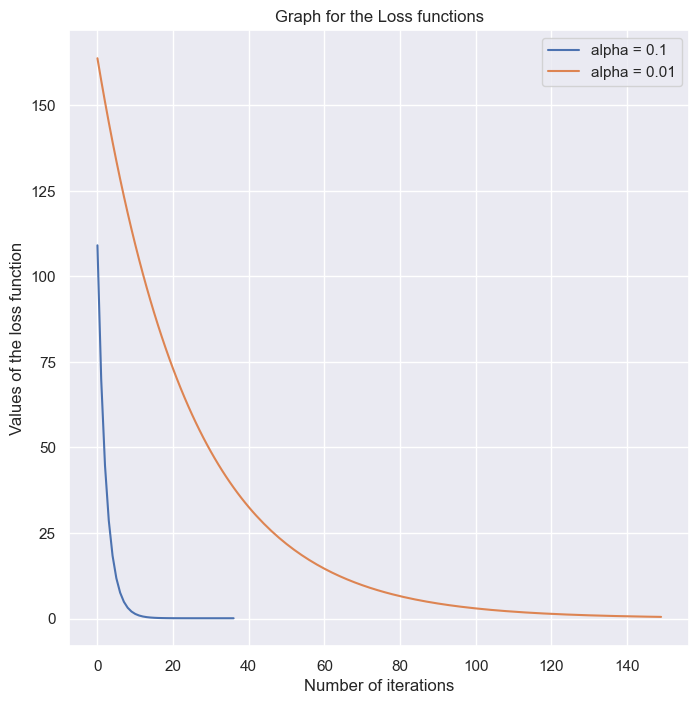

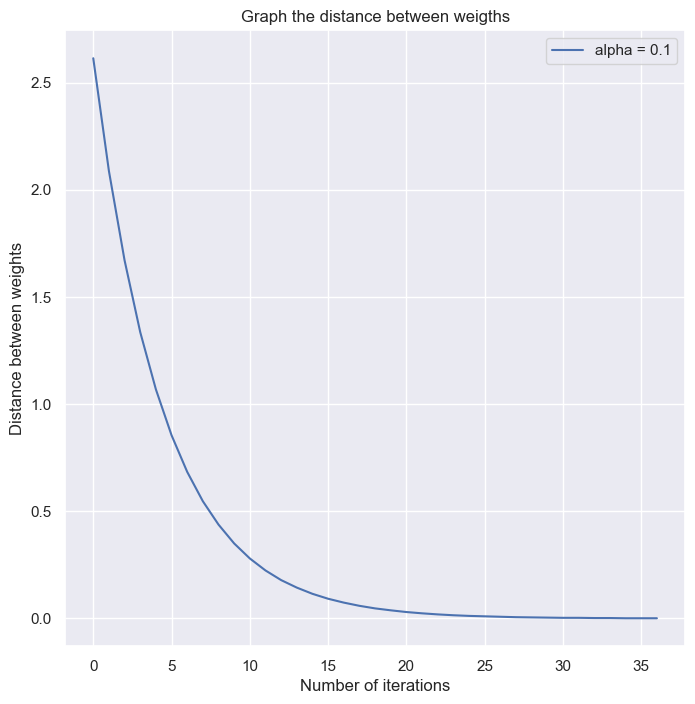

In [13]:
plt.figure(figsize=(8,8))

data3 = gradDescent([0 for _ in range(11)], 0.1, norm(X), datY, maxiter=150)
x3 = len(data3[1])
y3 = data3[1]

plt.plot(range(x3), y3, label='alpha = 0.1')
plt.xlabel('Number of iterations')
plt.ylabel('Values of the loss function')
plt.title('Graph for the Loss functions')
plt.legend()

data4 = gradDescent([0 for _ in range(11)], 0.01, norm(X), datY, maxiter=150)
x4 = len(data4[1])
y4 = data4[1]

plt.plot(range(x4), y4, label='alpha = 0.01')
plt.xlabel('Number of iterations')
plt.ylabel('Values of the loss function')
plt.legend()

data5 = gradDescent([0 for _ in range(11)], 0.0000001, norm(X), datY, maxiter=150)
df = pd.DataFrame(zip([round(i, 6) for i in data1[0][-1]], 
                                   [round(i, 6) for i in data5[0][-1]]))
df.columns = ['old_w', 'new_w']
print('The values of the weights before normalization and after \n(alpha = 0.0000001 number of iterations = 150)')
print(df)

distance = []
prev_vector = data3[0][0]
for vector in data3[0][1:]:
    distance.append(round(np.linalg.norm(prev_vector - vector), 3))
    prev_vector = vector

plt.figure(figsize=(8,8))

plt.plot(range(x3), distance, label='alpha = 0.1')
plt.xlabel('Number of iterations')
plt.ylabel('Distance between weights')
plt.title('Graph the distance between weigths')
plt.legend()

print('\nPredicted prices after normalization:')
test_w = gradDescent([0 for _ in range(11)], 0.1, norm(X), datY)[0][-1]
test_X = norm(X).iloc[:10]
test_Y = datY[:10]
price_comparison(test_w, test_X, test_Y)

### 8. Better pay twice

Sometimes it is essential to alter the loss function and make it assymetric. Normally, it is motivated by the task itself. For instance, in our case assume that one uses our prediction to bid for an apartment: hence if our $\hat{y}>y$ then we will overpay, but if $\hat{y}<y$ we will not get an apartment, but also won't lose any money. 

Let us introduce our new function:
$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N \begin{cases} a(y_i-\hat{y}_i)^2, \quad y_i>\hat{y}_i \\ b(y_i-\hat{y}_i)^2, \quad y_i\le\hat{y}_i \end{cases}
$$

Let's implement new loss and new gradient:

In [14]:
def new_loss(w, X, y, a, b):
    first_column = np.array([np.full(shape=N, fill_value=1)]) # (1, 1, ..., 1)
    X = np.concatenate((first_column.T, np.array(X)), axis=1) # add first column (1, 1, ..., 1)
    yi = np.dot(X, w)
    return (np.where(y > yi, a * np.square(yi - y), b * np.square(yi - y))).mean() # new lossValue

def new_grad(w_k, X, y, a, b):
    #your code goes here
    first_column = np.array([np.full(shape=N, fill_value=1)]) # (1, 1, ..., 1)
    X = np.concatenate((first_column.T, np.array(X)), axis=1) # add first column (1, 1, ..., 1)
    yi = np.dot(X, w_k)
    lossGradient = (2 / N) * np.matmul(np.transpose(X), 
                                       (np.where(y > yi, a * (yi - y), b * (yi - y))))
    return lossGradient # new lossGradient

### 9. More experiments

Now let us experiment with new functions:

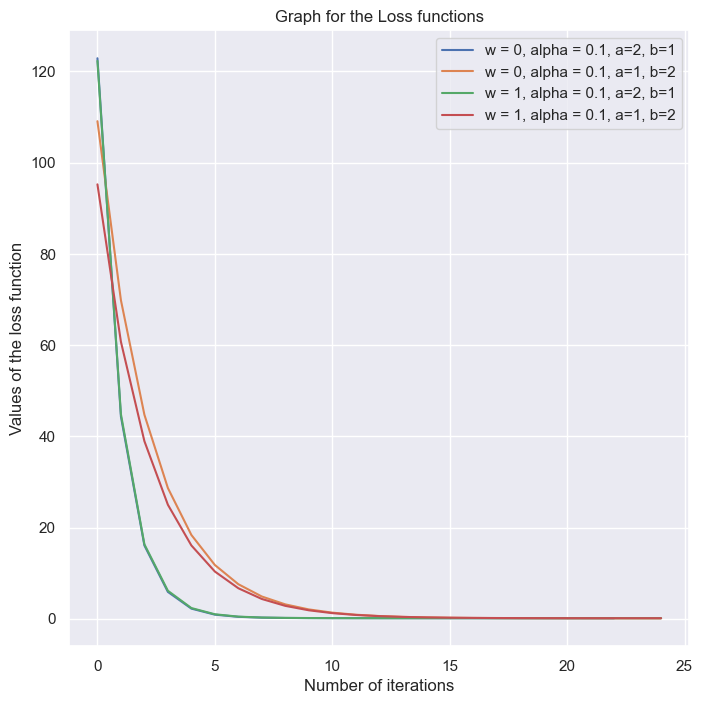

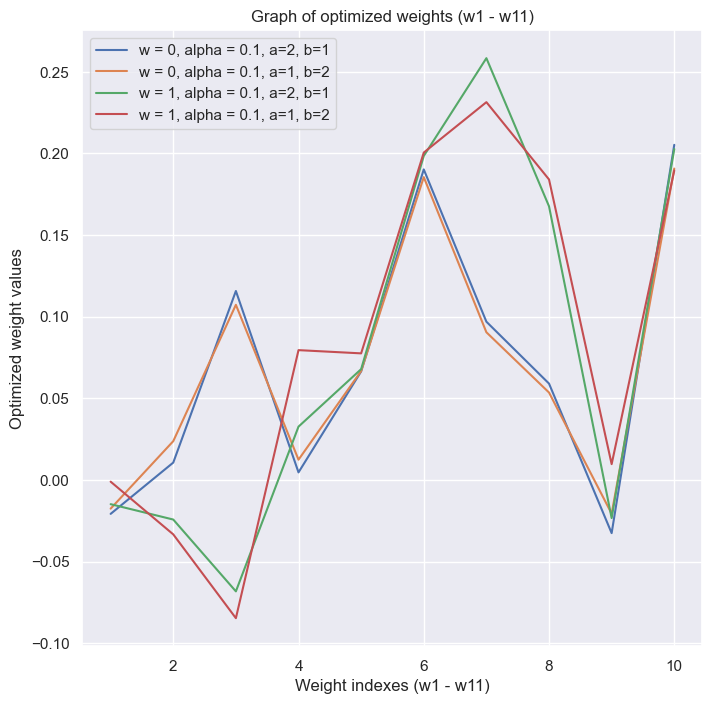

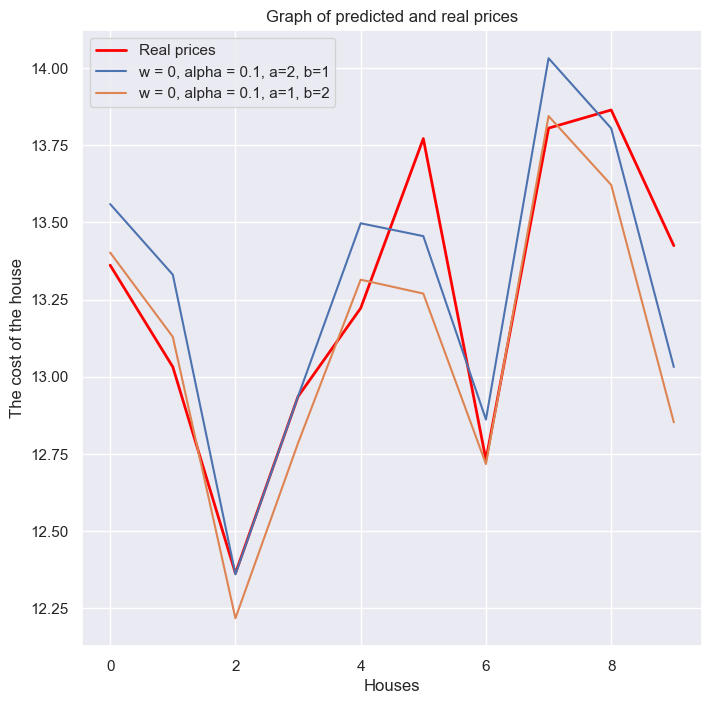

In [15]:
def new_gradDescent(w_init, alpha, X, y, a, b, maxiter=500, eps=1e-2):
    losses=[]
    weights=[w_init]

    curiter=0
    w_k=weights[-1]

    while curiter < maxiter:
        w_k = w_k - alpha * new_grad(w_k, X, y, a, b)
        lossValue_k = new_loss(w_k, X, y, a, b)
        weights.append(w_k)
        losses.append(lossValue_k)
        curiter += 1
        if np.linalg.norm(new_grad(w_k, X, y, a, b)) < eps:
            return weights, losses
    return weights, losses

def predicted_prices(w, X, y):
    first_column = np.array([np.full(shape=len(y), fill_value=1)]) # (1, 1, ..., 1)
    X = np.concatenate((first_column.T, np.array(X)), axis=1) # add first column (1, 1, ..., 1)
    yi = np.dot(X, w)
    result = []
    for price in yi:
        result.append(price)
    return result

a1 = 2
b1 = 1
a2 = 1
b2 = 2

data6 = new_gradDescent([0 for _ in range(11)], 0.1, norm(X), datY, a1, b1, maxiter=25)
x6 = len(data6[1])
y6 = data6[1]

data7 = new_gradDescent([0 for _ in range(11)], 0.1, norm(X), datY, a2, b2, maxiter=25)
x7 = len(data7[1])
y7 = data7[1]

data8 = new_gradDescent([1 for _ in range(11)], 0.1, norm(X), datY, a1, b1, maxiter=25)
x8 = len(data8[1])
y8 = data8[1]

data9 = new_gradDescent([1 for _ in range(11)], 0.1, norm(X), datY, a2, b2, maxiter=25)
x9 = len(data9[1])
y9 = data9[1]

plt.figure(figsize=(8,8))

plt.plot(range(x6), y6, label='w = 0, alpha = 0.1, a=2, b=1')
plt.plot(range(x7), y7, label='w = 0, alpha = 0.1, a=1, b=2')
plt.plot(range(x8), y8, label='w = 1, alpha = 0.1, a=2, b=1')
plt.plot(range(x9), y9, label='w = 1, alpha = 0.1, a=1, b=2')
plt.xlabel('Number of iterations')
plt.ylabel('Values of the loss function')
plt.title('Graph for the Loss functions')
plt.legend()

plt.figure(figsize=(8,8))

x_weights = range(1, 11)
y_weights_1 = data6[0][-1][1:]
y_weights_2 = data7[0][-1][1:]
y_weights_3 = data8[0][-1][1:]
y_weights_4 = data9[0][-1][1:]

plt.plot(x_weights, y_weights_1, label='w = 0, alpha = 0.1, a=2, b=1')
plt.plot(x_weights, y_weights_2, label='w = 0, alpha = 0.1, a=1, b=2')
plt.plot(x_weights, y_weights_3, label='w = 1, alpha = 0.1, a=2, b=1')
plt.plot(x_weights, y_weights_4, label='w = 1, alpha = 0.1, a=1, b=2')
plt.xlabel('Weight indexes (w1 - w11)')
plt.ylabel('Optimized weight values')
plt.title('Graph of optimized weights (w1 - w11)')
plt.legend()

plt.figure(figsize=(8,8))

test_w_1 = data6[0][-1]
test_X_1 = norm(X).iloc[:10]
test_Y_1 = datY[:10]
prices_1 = predicted_prices(test_w_1, test_X_1, test_Y_1)
test_w_2 = data7[0][-1]
test_X_2 = norm(X).iloc[:10]
test_Y_2 = datY[:10]
prices_2 = predicted_prices(test_w_2, test_X_2, test_Y_2)


plt.plot(range(10), datY[:10], label='Real prices', linewidth=2, color='red')
plt.plot(range(10), prices_1, label='w = 0, alpha = 0.1, a=2, b=1')
plt.plot(range(10), prices_2, label='w = 0, alpha = 0.1, a=1, b=2')

plt.xlabel('Houses')
plt.ylabel('The cost of the house')
plt.title('Graph of predicted and real prices')
plt.legend()


### 10. Conclusions

1. Alpha and coefficients a and b affect the performance of stabilized weights if we consider experiments with the same number of iterations:

- at low alpha values, more iterations are required to achieve a stabilization state, and the initial weights will differ less from the final ones;

- with large alpha values, fewer iterations will be required to achieve a stabilization state, and the initial weights will differ significantly from the final ones;

- using large values of a and b (for example, at a = 10) will lead to the fact that the weights will increase at each iteration and will not enter a stabilization state, since we will significantly increase the standard deviation when calculating the gradient of the function;

- using small values of a or b (not much different from 1) will make it possible to adjust the result of the function, depending on our goals.

2. If a = 1 - when calculating the standard deviation, if the predicted price is less than the real price, the standard deviation will not change, if the predicted price is greater than the real price, the standard deviation will be multiplied by "b". 
- if we want our model to produce a result greater than the real price, we should experiment with values "b" less than 1;
- if we want our model to produce a result less than the real price, we should choose values "b" greater than 1.


 
 
If you have any questions - telegram @Jeremix.